#  Redes convolucionales + SVM

## 1. crear el codigo convolucional

### 1.1 Tomar código del proyecto 1 y reducir complejidad

#### 1.1.0 importar librerias

In [1]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, recall_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

#### 1.1.1 reducir muestreo de imagenes al 15%

In [2]:

# cargar CSV
data = pd.read_csv("/Users/danielmac/Downloads/archive (2)/furniture_data_img.csv")
exclude_categories = ["Lighting", "Other", "TV / stereo", "Antique / art", "Textiles / decoration"]

# Excluir información con pocos datos
data = data[~data["Furniture_Type"].isin(exclude_categories)]
# Definir el Path para las imagenes
image_dir = "/Users/danielmac/Downloads/archive (2)/furniture_images/"

# cargar imagenes
image_data = []
for image_file in data["Image_File"]:
    image_path = image_dir + image_file  # concatenar path
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(150, 150))
    img = tf.keras.preprocessing.image.img_to_array(img)
    img = img / 255.0  # Normalizar valores de pixeles
    image_data.append(img)

X = np.array(image_data)
y = data["Furniture_Type"]

# Encode las etiquetas
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

print(X.shape)
print(y.shape)

(8601, 150, 150, 3)
(8601,)


In [3]:

# cargar CSV
data = pd.read_csv("/Users/danielmac/Downloads/archive (2)/furniture_data_img.csv")
exclude_categories = ["Lighting", "Other", "TV / stereo", "Antique / art", "Textiles / decoration"]

# Excluir información con pocos datos
data = data[~data["Furniture_Type"].isin(exclude_categories)]
# Definir el Path para las imagenes
image_dir = "/Users/danielmac/Downloads/archive (2)/furniture_images/"

# cargar imagenes
image_data = []
for image_file in data["Image_File"]:
    image_path = image_dir + image_file  # concatenar path
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(150, 150))
    img = tf.keras.preprocessing.image.img_to_array(img)
    img = img / 255.0  # Normalizar valores de pixeles
    image_data.append(img)

X = np.array(image_data)
y = data["Furniture_Type"]

# Encode las etiquetas
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# separar data entre entrenamiento y test (solo usar 10% para entrenamiento)
X_train, X_test_val, y_train, y_test_val = train_test_split(X, y, test_size=0.90, stratify=y)

#separar el 20% en 50% c/u para val y test
X_val,X_test, y_val,y_test = train_test_split(X_test_val, y_test_val, test_size=0.05, random_state=42,stratify=y_test_val)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (860, 150, 150, 3)
y_train shape: (860,)
X_val shape: (7353, 150, 150, 3)
y_val shape: (7353,)
X_test shape: (388, 150, 150, 3)
y_test shape: (388,)


#### 1.1.2 Crear la función del modelo para 3 layers exclusivamente (sin DataGen), y con valor L el cuál será dinamico.

In [4]:
def create_cnn_model(L, X_train, y_train, batch_size, epochs):
    model = Sequential([
        Conv2D(L, (3, 3), activation='relu', input_shape=(150, 150, 3)),
        MaxPooling2D((3, 3), padding='same'),
        Conv2D(L * 2, (3, 3), activation='relu'),
        MaxPooling2D((3, 3), padding='same'),
        Conv2D(L * 4, (2, 2), activation='relu'),
        MaxPooling2D((3, 3), padding='same'),
        Flatten(),
        Dense(512, activation='relu'),
        Dropout(0.5),
        Dense(len(label_encoder.classes_), activation='softmax')
    ])

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Fit el modelo para obtener el loss
    history = history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test))

    # guardar el valor del loss de la última corrida
    train_loss = history.history['loss'][-1]

    return model, train_loss

# Usage example:
#L = 64  # You can set X to your desired value
#batch_size = 32
#epochs = 10
#model, train_loss = create_cnn_model(L, X_train, y_train, batch_size, epochs)



## Código final con L= 24 (Segun ABC)

Epoch 1/15
189/189 [==============================] - 25s 127ms/step - loss: 1.2849 - accuracy: 0.3944 - val_loss: 1.1981 - val_accuracy: 0.4696
Epoch 2/15
189/189 [==============================] - 19s 98ms/step - loss: 1.1400 - accuracy: 0.4965 - val_loss: 1.0986 - val_accuracy: 0.5246
Epoch 3/15
189/189 [==============================] - 17s 90ms/step - loss: 1.0247 - accuracy: 0.5651 - val_loss: 0.9479 - val_accuracy: 0.6021
Epoch 4/15
189/189 [==============================] - 17s 92ms/step - loss: 0.9026 - accuracy: 0.6216 - val_loss: 0.8844 - val_accuracy: 0.6265
Epoch 5/15
189/189 [==============================] - 17s 91ms/step - loss: 0.8256 - accuracy: 0.6613 - val_loss: 0.9962 - val_accuracy: 0.5843
Epoch 6/15
189/189 [==============================] - 17s 92ms/step - loss: 0.7522 - accuracy: 0.6977 - val_loss: 0.8261 - val_accuracy: 0.6621
Epoch 7/15
189/189 [==============================] - 17s 92ms/step - loss: 0.6723 - accuracy: 0.7336 - val_loss: 0.8043 - val_accuracy

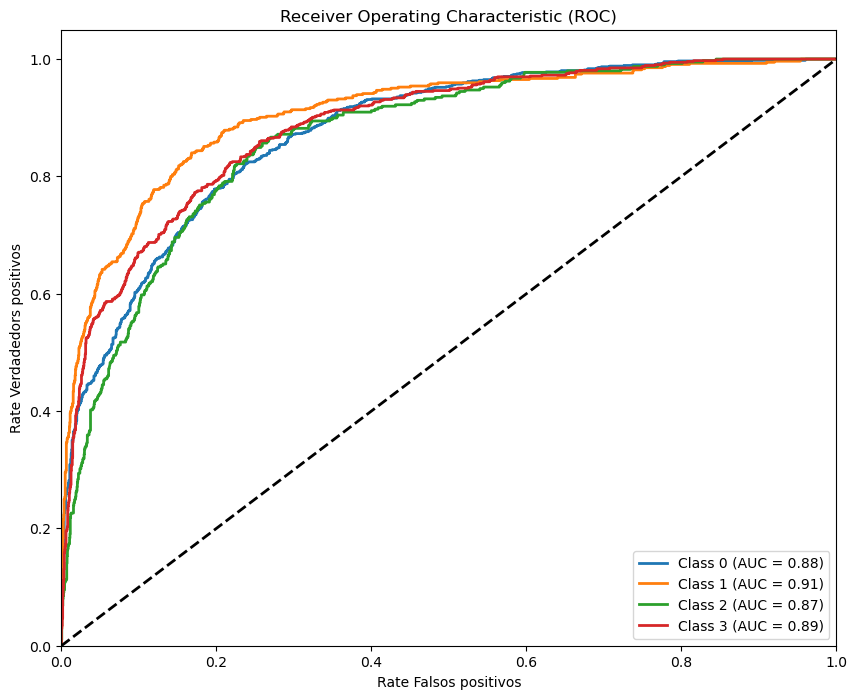

In [8]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, recall_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# cargar CSV
data = pd.read_csv("/Users/danielmac/Downloads/archive (2)/furniture_data_img.csv")
exclude_categories = ["Lighting", "Other", "TV / stereo", "Antique / art", "Textiles / decoration"]

# Excluir información con pocos datos
data = data[~data["Furniture_Type"].isin(exclude_categories)]
# Definir el Path para las imagenes
image_dir = "/Users/danielmac/Downloads/archive (2)/furniture_images/"

# cargar imagenes
image_data = []
for image_file in data["Image_File"]:
    image_path = image_dir + image_file  # concatenar path
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(150, 150))
    img = tf.keras.preprocessing.image.img_to_array(img)
    img = img / 255.0  # Normalizar valores de pixeles
    image_data.append(img)

X = np.array(image_data)
y = data["Furniture_Type"]

# Encode las etiquetas
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# separar data entre entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y)

# MEJOR L
L=24

# Modelo CNN con L
model = Sequential([
    Conv2D(L, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((3, 3),padding='same'),
    Conv2D(L*2, (3, 3), activation='relu'),
    MaxPooling2D((3, 3),padding='same'),
    Conv2D(L*4, (2, 2), activation='relu'),
    MaxPooling2D((3, 3),padding='same'),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(len(label_encoder.classes_), activation='softmax')
])

# Compilar el modelo con optimizador ADAM y sparse categorical crossentropy
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])



# Fit del modelo
batch_size = 32
epochs = 15
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test))

# guardar modelo en KERAS
model.save('furniture_recognition_model.keras')

# hacer predicción de 1 imagen
new_image_path = "/Users/danielmac/Downloads/Test/sillatest.jpg"
new_image_path = os.path.join(new_image_path)  # concatenar directorio
new_img = tf.keras.preprocessing.image.load_img(new_image_path, target_size=(150, 150))
new_img = tf.keras.preprocessing.image.img_to_array(new_img)
new_img = new_img / 255.0
new_img = np.expand_dims(new_img, axis=0)  # Añadir dimension del Batch
prediction = model.predict(new_img)
predicted_label = label_encoder.inverse_transform([np.argmax(prediction)])[0]

print(f"El modelo predijo que la foto es: {predicted_label}")

# Evaluar modelo
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = y_test
#Accuracy, recall y F1
accuracy = accuracy_score(y_true, y_pred_classes)
f1 = f1_score(y_true, y_pred_classes, average='weighted')
recall = recall_score(y_true, y_pred_classes, average='weighted')
#imprimir datos finales 
print(f"Accuracy: {accuracy:.4f}\nF1 Score: {f1:.4f}\nRecall (Sensitivity): {recall:.4f}")

# Crear un modelo de clasificación
report = classification_report(y_true, y_pred_classes, target_names=label_encoder.classes_)
print("Reporte de clasificación:\n", report)

# Crear matriz de confusión
conf_matrix = confusion_matrix(y_true, y_pred_classes)
print("Confusion Matrix:\n", conf_matrix)

y_test_onehot = label_binarize(y_test, classes=np.arange(len(label_encoder.classes_)))

#Curva ROC para multiclasificación
fpr = dict()
tpr = dict()
roc_auc = dict()

y_pred_prob = model.predict(X_test)

for i in range(len(label_encoder.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test_onehot[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Imprimir curvas ROC
plt.figure(figsize=(10, 8))
for i in range(len(label_encoder.classes_)):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Rate Falsos positivos')
plt.ylabel('Rate Verdadedors positivos')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()




### Codigo para SVM con Kernel Lineal

81/81 [==============================] - 2s 22ms/step


/Users/danielmac/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report for All Classes:
                          precision    recall  f1-score   support

     Bed / bedroom item       0.73      0.68      0.71       913
Sofa / living room item       0.72      0.68      0.70       544
                Storage       0.55      0.47      0.51       398
          Table / chair       0.72      0.68      0.70       726

              micro avg       0.70      0.65      0.67      2581
              macro avg       0.68      0.63      0.65      2581
           weighted avg       0.70      0.65      0.67      2581
            samples avg       0.62      0.65      0.63      2581



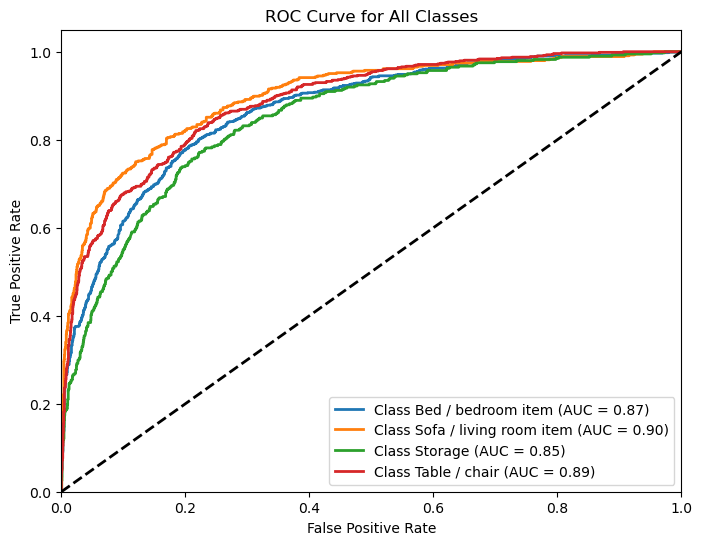

In [15]:
from sklearn.svm import SVC



# Extraer features del modelo
cnn_features_model = tf.keras.Model(inputs=model.input, outputs=model.layers[-2].output)
X_train_features = cnn_features_model.predict(X_train)
X_test_features = cnn_features_model.predict(X_test)

# Convertir label multiclase en binario
y_train_bin = label_binarize(y_train, classes=np.arange(len(label_encoder.classes_)))
y_test_bin = label_binarize(y_test, classes=np.arange(len(label_encoder.classes_)))

# Entrenar un SVM para cada label
svm_classifiers = []

for i in range(len(label_encoder.classes_)):
    svm_classifier = SVC(kernel='linear', probability=True)
    svm_classifier.fit(X_train_features, y_train_bin[:, i])
    svm_classifiers.append(svm_classifier)

# Evaluar prediciones de los SVM
svm_predictions = np.column_stack([svm_classifier.predict(X_test_features) for svm_classifier in svm_classifiers])

# Imprimir reporte de clasificacion
report = classification_report(y_test_bin, svm_predictions, target_names=label_encoder.classes_)
print("Classification Report for All Classes:\n", report)

# Plot ROC para todos
plt.figure(figsize=(8, 6))

for i, svm_classifier in enumerate(svm_classifiers):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], svm_classifier.decision_function(X_test_features))
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Class {label_encoder.classes_[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Falsos Positivos Ratio')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve para cada clase')
plt.legend(loc='lower right')
plt.show()


## Corrida 2

Epoch 1/15
189/189 [==============================] - 20s 103ms/step - loss: 1.2741 - accuracy: 0.4096 - val_loss: 1.1614 - val_accuracy: 0.4994
Epoch 2/15
189/189 [==============================] - 16s 87ms/step - loss: 1.1110 - accuracy: 0.5154 - val_loss: 1.0988 - val_accuracy: 0.5149
Epoch 3/15
189/189 [==============================] - 17s 88ms/step - loss: 0.9613 - accuracy: 0.5967 - val_loss: 0.9164 - val_accuracy: 0.6288
Epoch 4/15
189/189 [==============================] - 17s 88ms/step - loss: 0.8487 - accuracy: 0.6495 - val_loss: 0.9484 - val_accuracy: 0.6060
Epoch 5/15
189/189 [==============================] - 17s 90ms/step - loss: 0.7579 - accuracy: 0.6907 - val_loss: 0.8230 - val_accuracy: 0.6726
Epoch 6/15
189/189 [==============================] - 20s 105ms/step - loss: 0.6806 - accuracy: 0.7309 - val_loss: 0.8331 - val_accuracy: 0.6680
Epoch 7/15
189/189 [==============================] - 18s 96ms/step - loss: 0.6042 - accuracy: 0.7588 - val_loss: 0.8191 - val_accurac

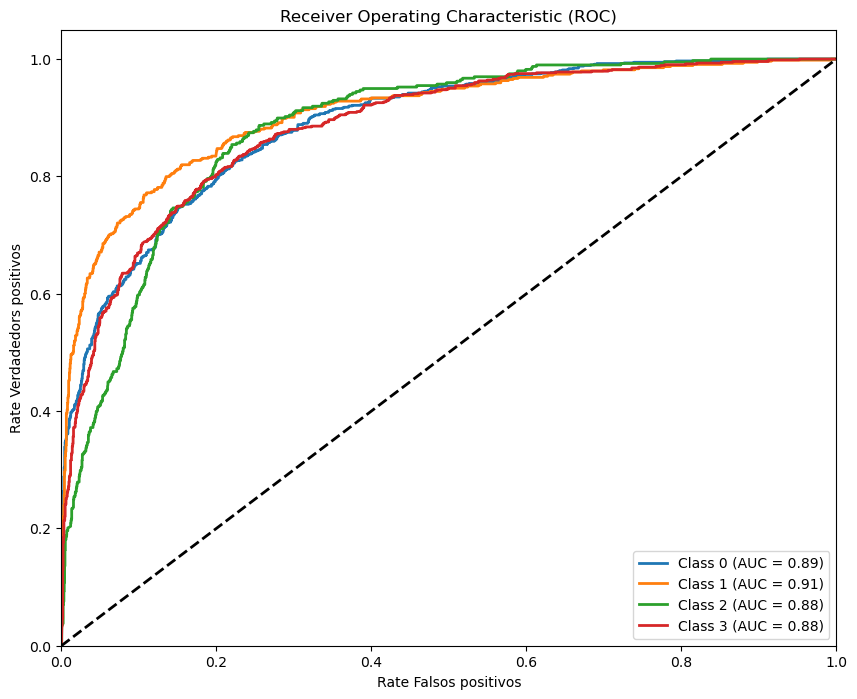

In [17]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, recall_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# cargar CSV
data = pd.read_csv("/Users/danielmac/Downloads/archive (2)/furniture_data_img.csv")
exclude_categories = ["Lighting", "Other", "TV / stereo", "Antique / art", "Textiles / decoration"]

# Excluir información con pocos datos
data = data[~data["Furniture_Type"].isin(exclude_categories)]
# Definir el Path para las imagenes
image_dir = "/Users/danielmac/Downloads/archive (2)/furniture_images/"

# cargar imagenes
image_data = []
for image_file in data["Image_File"]:
    image_path = image_dir + image_file  # concatenar path
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(150, 150))
    img = tf.keras.preprocessing.image.img_to_array(img)
    img = img / 255.0  # Normalizar valores de pixeles
    image_data.append(img)

X = np.array(image_data)
y = data["Furniture_Type"]

# Encode las etiquetas
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# separar data entre entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y)

# MEJOR L
L=24

# Modelo CNN con L
model = Sequential([
    Conv2D(L, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((3, 3),padding='same'),
    Conv2D(L*2, (3, 3), activation='relu'),
    MaxPooling2D((3, 3),padding='same'),
    Conv2D(L*4, (2, 2), activation='relu'),
    MaxPooling2D((3, 3),padding='same'),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(len(label_encoder.classes_), activation='softmax')
])

# Compilar el modelo con optimizador ADAM y sparse categorical crossentropy
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])



# Fit del modelo
batch_size = 32
epochs = 15
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test))

# guardar modelo en KERAS
model.save('furniture_recognition_model.keras')

# hacer predicción de 1 imagen
new_image_path = "/Users/danielmac/Downloads/Test/sillatest.jpg"
new_image_path = os.path.join(new_image_path)  # concatenar directorio
new_img = tf.keras.preprocessing.image.load_img(new_image_path, target_size=(150, 150))
new_img = tf.keras.preprocessing.image.img_to_array(new_img)
new_img = new_img / 255.0
new_img = np.expand_dims(new_img, axis=0)  # Añadir dimension del Batch
prediction = model.predict(new_img)
predicted_label = label_encoder.inverse_transform([np.argmax(prediction)])[0]

print(f"El modelo predijo que la foto es: {predicted_label}")

# Evaluar modelo
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = y_test
#Accuracy, recall y F1
accuracy = accuracy_score(y_true, y_pred_classes)
f1 = f1_score(y_true, y_pred_classes, average='weighted')
recall = recall_score(y_true, y_pred_classes, average='weighted')
#imprimir datos finales 
print(f"Accuracy: {accuracy:.4f}\nF1 Score: {f1:.4f}\nRecall (Sensitivity): {recall:.4f}")

# Crear un modelo de clasificación
report = classification_report(y_true, y_pred_classes, target_names=label_encoder.classes_)
print("Reporte de clasificación:\n", report)

# Crear matriz de confusión
conf_matrix = confusion_matrix(y_true, y_pred_classes)
print("Confusion Matrix:\n", conf_matrix)

y_test_onehot = label_binarize(y_test, classes=np.arange(len(label_encoder.classes_)))

#Curva ROC para multiclasificación
fpr = dict()
tpr = dict()
roc_auc = dict()

y_pred_prob = model.predict(X_test)

for i in range(len(label_encoder.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test_onehot[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Imprimir curvas ROC
plt.figure(figsize=(10, 8))
for i in range(len(label_encoder.classes_)):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Rate Falsos positivos')
plt.ylabel('Rate Verdadedors positivos')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

81/81 [==============================] - 2s 26ms/step


/Users/danielmac/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report for All Classes:
                          precision    recall  f1-score   support

     Bed / bedroom item       0.74      0.73      0.73       913
Sofa / living room item       0.75      0.68      0.71       544
                Storage       0.56      0.50      0.53       398
          Table / chair       0.72      0.67      0.69       726

              micro avg       0.71      0.67      0.69      2581
              macro avg       0.69      0.65      0.67      2581
           weighted avg       0.71      0.67      0.69      2581
            samples avg       0.64      0.67      0.65      2581



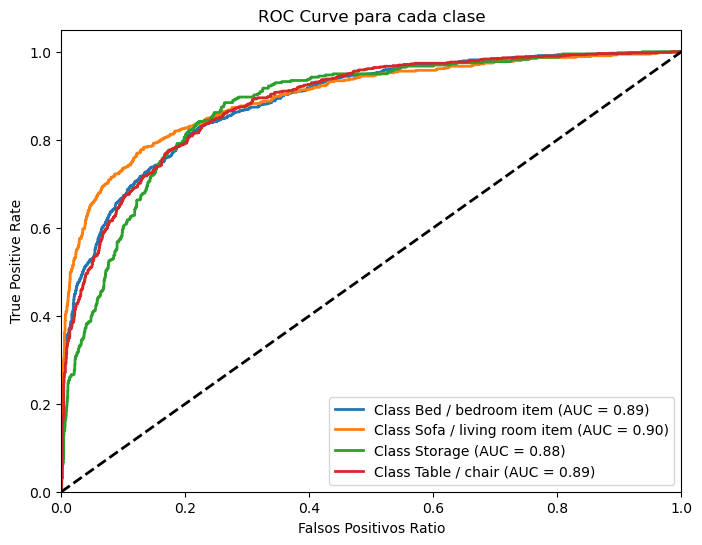

In [18]:
from sklearn.svm import SVC



# Extraer features del modelo
cnn_features_model = tf.keras.Model(inputs=model.input, outputs=model.layers[-2].output)
X_train_features = cnn_features_model.predict(X_train)
X_test_features = cnn_features_model.predict(X_test)

# Convertir label multiclase en binario
y_train_bin = label_binarize(y_train, classes=np.arange(len(label_encoder.classes_)))
y_test_bin = label_binarize(y_test, classes=np.arange(len(label_encoder.classes_)))

# Entrenar un SVM para cada label
svm_classifiers = []

for i in range(len(label_encoder.classes_)):
    svm_classifier = SVC(kernel='linear', probability=True)
    svm_classifier.fit(X_train_features, y_train_bin[:, i])
    svm_classifiers.append(svm_classifier)

# Evaluar prediciones de los SVM
svm_predictions = np.column_stack([svm_classifier.predict(X_test_features) for svm_classifier in svm_classifiers])

# Imprimir reporte de clasificacion
report = classification_report(y_test_bin, svm_predictions, target_names=label_encoder.classes_)
print("Classification Report for All Classes:\n", report)

# Plot ROC para todos
plt.figure(figsize=(8, 6))

for i, svm_classifier in enumerate(svm_classifiers):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], svm_classifier.decision_function(X_test_features))
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Class {label_encoder.classes_[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Falsos Positivos Ratio')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve para cada clase')
plt.legend(loc='lower right')
plt.show()

## Utilizando kernel rbf

81/81 [==============================] - 2s 24ms/step


/Users/danielmac/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report for All Classes:
                          precision    recall  f1-score   support

     Bed / bedroom item       0.76      0.73      0.74       913
Sofa / living room item       0.75      0.68      0.71       544
                Storage       0.58      0.49      0.53       398
          Table / chair       0.75      0.66      0.70       726

              micro avg       0.73      0.66      0.69      2581
              macro avg       0.71      0.64      0.67      2581
           weighted avg       0.73      0.66      0.69      2581
            samples avg       0.65      0.66      0.66      2581



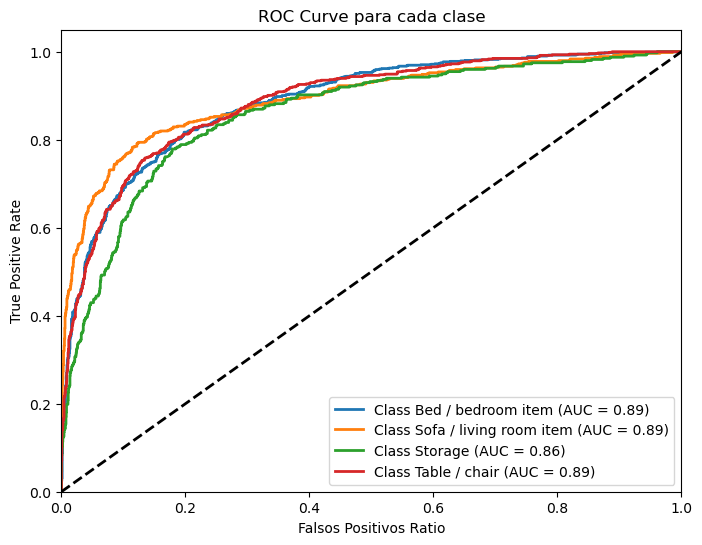

In [19]:
from sklearn.svm import SVC



# Extraer features del modelo
cnn_features_model = tf.keras.Model(inputs=model.input, outputs=model.layers[-2].output)
X_train_features = cnn_features_model.predict(X_train)
X_test_features = cnn_features_model.predict(X_test)

# Convertir label multiclase en binario
y_train_bin = label_binarize(y_train, classes=np.arange(len(label_encoder.classes_)))
y_test_bin = label_binarize(y_test, classes=np.arange(len(label_encoder.classes_)))

# Entrenar un SVM para cada label
svm_classifiers = []

for i in range(len(label_encoder.classes_)):
    svm_classifier = SVC(kernel='rbf', probability=True)
    svm_classifier.fit(X_train_features, y_train_bin[:, i])
    svm_classifiers.append(svm_classifier)

# Evaluar prediciones de los SVM
svm_predictions = np.column_stack([svm_classifier.predict(X_test_features) for svm_classifier in svm_classifiers])

# Imprimir reporte de clasificacion
report = classification_report(y_test_bin, svm_predictions, target_names=label_encoder.classes_)
print("Classification Report for All Classes:\n", report)

# Plot ROC para todos
plt.figure(figsize=(8, 6))

for i, svm_classifier in enumerate(svm_classifiers):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], svm_classifier.decision_function(X_test_features))
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Class {label_encoder.classes_[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Falsos Positivos Ratio')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve para cada clase')
plt.legend(loc='lower right')
plt.show()

## Corrida 2

Epoch 1/15
189/189 [==============================] - 20s 103ms/step - loss: 1.2682 - accuracy: 0.4018 - val_loss: 1.2424 - val_accuracy: 0.4297
Epoch 2/15
189/189 [==============================] - 16s 86ms/step - loss: 1.1040 - accuracy: 0.5135 - val_loss: 1.0949 - val_accuracy: 0.5153
Epoch 3/15
189/189 [==============================] - 17s 88ms/step - loss: 0.9832 - accuracy: 0.5875 - val_loss: 0.9099 - val_accuracy: 0.6226
Epoch 4/15
189/189 [==============================] - 17s 89ms/step - loss: 0.8627 - accuracy: 0.6390 - val_loss: 0.8616 - val_accuracy: 0.6447
Epoch 5/15
189/189 [==============================] - 17s 91ms/step - loss: 0.7881 - accuracy: 0.6792 - val_loss: 0.8501 - val_accuracy: 0.6668
Epoch 6/15
189/189 [==============================] - 17s 92ms/step - loss: 0.7057 - accuracy: 0.7146 - val_loss: 0.8831 - val_accuracy: 0.6521
Epoch 7/15
189/189 [==============================] - 17s 92ms/step - loss: 0.6334 - accuracy: 0.7458 - val_loss: 0.8768 - val_accuracy

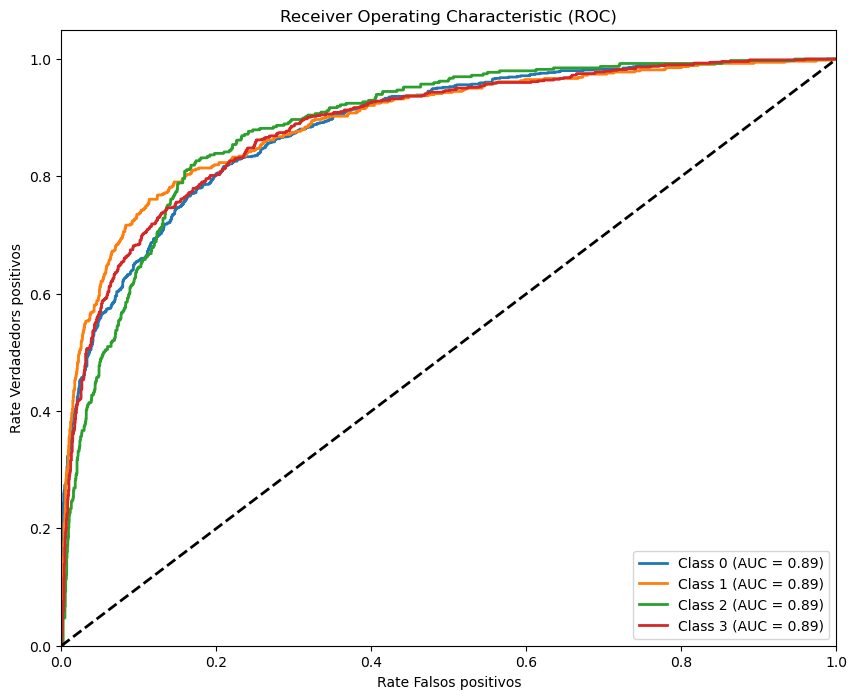

In [21]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, recall_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# cargar CSV
data = pd.read_csv("/Users/danielmac/Downloads/archive (2)/furniture_data_img.csv")
exclude_categories = ["Lighting", "Other", "TV / stereo", "Antique / art", "Textiles / decoration"]

# Excluir información con pocos datos
data = data[~data["Furniture_Type"].isin(exclude_categories)]
# Definir el Path para las imagenes
image_dir = "/Users/danielmac/Downloads/archive (2)/furniture_images/"

# cargar imagenes
image_data = []
for image_file in data["Image_File"]:
    image_path = image_dir + image_file  # concatenar path
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(150, 150))
    img = tf.keras.preprocessing.image.img_to_array(img)
    img = img / 255.0  # Normalizar valores de pixeles
    image_data.append(img)

X = np.array(image_data)
y = data["Furniture_Type"]

# Encode las etiquetas
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# separar data entre entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y)

# MEJOR L
L=24

# Modelo CNN con L
model = Sequential([
    Conv2D(L, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((3, 3),padding='same'),
    Conv2D(L*2, (3, 3), activation='relu'),
    MaxPooling2D((3, 3),padding='same'),
    Conv2D(L*4, (2, 2), activation='relu'),
    MaxPooling2D((3, 3),padding='same'),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(len(label_encoder.classes_), activation='softmax')
])

# Compilar el modelo con optimizador ADAM y sparse categorical crossentropy
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])



# Fit del modelo
batch_size = 32
epochs = 15
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test))

# guardar modelo en KERAS
model.save('furniture_recognition_model.keras')

# hacer predicción de 1 imagen
new_image_path = "/Users/danielmac/Downloads/Test/sillatest.jpg"
new_image_path = os.path.join(new_image_path)  # concatenar directorio
new_img = tf.keras.preprocessing.image.load_img(new_image_path, target_size=(150, 150))
new_img = tf.keras.preprocessing.image.img_to_array(new_img)
new_img = new_img / 255.0
new_img = np.expand_dims(new_img, axis=0)  # Añadir dimension del Batch
prediction = model.predict(new_img)
predicted_label = label_encoder.inverse_transform([np.argmax(prediction)])[0]

print(f"El modelo predijo que la foto es: {predicted_label}")

# Evaluar modelo
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = y_test
#Accuracy, recall y F1
accuracy = accuracy_score(y_true, y_pred_classes)
f1 = f1_score(y_true, y_pred_classes, average='weighted')
recall = recall_score(y_true, y_pred_classes, average='weighted')
#imprimir datos finales 
print(f"Accuracy: {accuracy:.4f}\nF1 Score: {f1:.4f}\nRecall (Sensitivity): {recall:.4f}")

# Crear un modelo de clasificación
report = classification_report(y_true, y_pred_classes, target_names=label_encoder.classes_)
print("Reporte de clasificación:\n", report)

# Crear matriz de confusión
conf_matrix = confusion_matrix(y_true, y_pred_classes)
print("Confusion Matrix:\n", conf_matrix)

y_test_onehot = label_binarize(y_test, classes=np.arange(len(label_encoder.classes_)))

#Curva ROC para multiclasificación
fpr = dict()
tpr = dict()
roc_auc = dict()

y_pred_prob = model.predict(X_test)

for i in range(len(label_encoder.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test_onehot[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Imprimir curvas ROC
plt.figure(figsize=(10, 8))
for i in range(len(label_encoder.classes_)):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Rate Falsos positivos')
plt.ylabel('Rate Verdadedors positivos')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

81/81 [==============================] - 2s 24ms/step


/Users/danielmac/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report for All Classes:
                          precision    recall  f1-score   support

     Bed / bedroom item       0.75      0.72      0.73       913
Sofa / living room item       0.76      0.68      0.72       544
                Storage       0.60      0.52      0.56       398
          Table / chair       0.76      0.68      0.72       726

              micro avg       0.73      0.67      0.70      2581
              macro avg       0.72      0.65      0.68      2581
           weighted avg       0.73      0.67      0.70      2581
            samples avg       0.65      0.67      0.66      2581



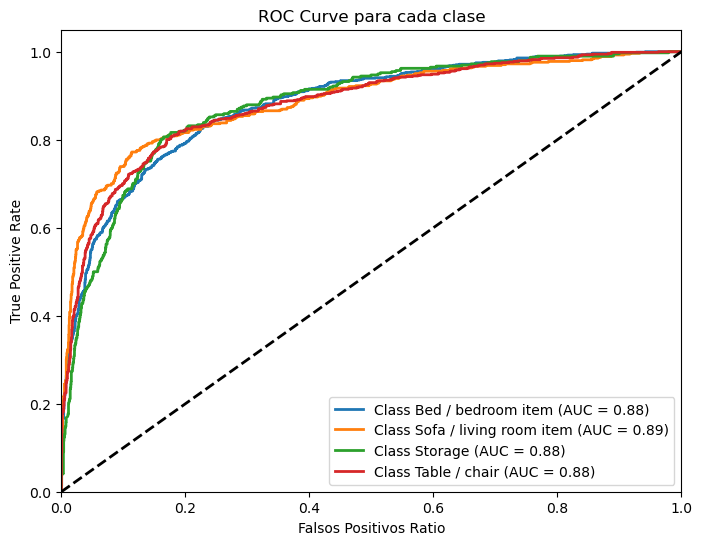

In [23]:
from sklearn.svm import SVC



# Extraer features del modelo
cnn_features_model = tf.keras.Model(inputs=model.input, outputs=model.layers[-2].output)
X_train_features = cnn_features_model.predict(X_train)
X_test_features = cnn_features_model.predict(X_test)

# Convertir label multiclase en binario
y_train_bin = label_binarize(y_train, classes=np.arange(len(label_encoder.classes_)))
y_test_bin = label_binarize(y_test, classes=np.arange(len(label_encoder.classes_)))

# Entrenar un SVM para cada label
svm_classifiers = []

for i in range(len(label_encoder.classes_)):
    svm_classifier = SVC(kernel='rbf', probability=True)
    svm_classifier.fit(X_train_features, y_train_bin[:, i])
    svm_classifiers.append(svm_classifier)

# Evaluar prediciones de los SVM
svm_predictions = np.column_stack([svm_classifier.predict(X_test_features) for svm_classifier in svm_classifiers])

# Imprimir reporte de clasificacion
report = classification_report(y_test_bin, svm_predictions, target_names=label_encoder.classes_)
print("Classification Report for All Classes:\n", report)

# Plot ROC para todos
plt.figure(figsize=(8, 6))

for i, svm_classifier in enumerate(svm_classifiers):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], svm_classifier.decision_function(X_test_features))
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Class {label_encoder.classes_[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Falsos Positivos Ratio')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve para cada clase')
plt.legend(loc='lower right')
plt.show()

### Dado que la mejor precisión la dejo el modelo con kernel RBF, se mantendrá el kernel y se cambiaran otros parametros 

## Cambio del C (sensibilidad de los errores)

In [29]:
### C=10

81/81 [==============================] - 2s 24ms/step


/Users/danielmac/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report for All Classes:
                          precision    recall  f1-score   support

     Bed / bedroom item       0.75      0.72      0.73       913
Sofa / living room item       0.74      0.66      0.70       544
                Storage       0.61      0.55      0.58       398
          Table / chair       0.76      0.68      0.72       726

              micro avg       0.73      0.67      0.70      2581
              macro avg       0.71      0.65      0.68      2581
           weighted avg       0.73      0.67      0.70      2581
            samples avg       0.66      0.67      0.66      2581



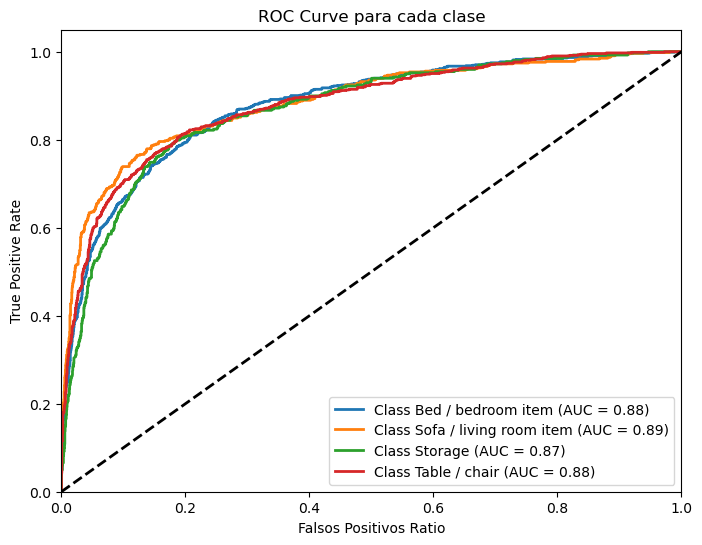

In [24]:
from sklearn.svm import SVC



# Extraer features del modelo
cnn_features_model = tf.keras.Model(inputs=model.input, outputs=model.layers[-2].output)
X_train_features = cnn_features_model.predict(X_train)
X_test_features = cnn_features_model.predict(X_test)

# Convertir label multiclase en binario
y_train_bin = label_binarize(y_train, classes=np.arange(len(label_encoder.classes_)))
y_test_bin = label_binarize(y_test, classes=np.arange(len(label_encoder.classes_)))

# Entrenar un SVM para cada label
svm_classifiers = []

for i in range(len(label_encoder.classes_)):
    svm_classifier = SVC(kernel='rbf', probability=True, C=10)
    svm_classifier.fit(X_train_features, y_train_bin[:, i])
    svm_classifiers.append(svm_classifier)

# Evaluar prediciones de los SVM
svm_predictions = np.column_stack([svm_classifier.predict(X_test_features) for svm_classifier in svm_classifiers])

# Imprimir reporte de clasificacion
report = classification_report(y_test_bin, svm_predictions, target_names=label_encoder.classes_)
print("Classification Report for All Classes:\n", report)

# Plot ROC para todos
plt.figure(figsize=(8, 6))

for i, svm_classifier in enumerate(svm_classifiers):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], svm_classifier.decision_function(X_test_features))
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Class {label_encoder.classes_[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Falsos Positivos Ratio')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve para cada clase')
plt.legend(loc='lower right')
plt.show()

### C=50

81/81 [==============================] - 2s 25ms/step


/Users/danielmac/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report for All Classes:
                          precision    recall  f1-score   support

     Bed / bedroom item       0.74      0.71      0.72       913
Sofa / living room item       0.74      0.66      0.70       544
                Storage       0.59      0.56      0.57       398
          Table / chair       0.74      0.68      0.71       726

              micro avg       0.72      0.67      0.69      2581
              macro avg       0.70      0.65      0.68      2581
           weighted avg       0.72      0.67      0.69      2581
            samples avg       0.65      0.67      0.66      2581



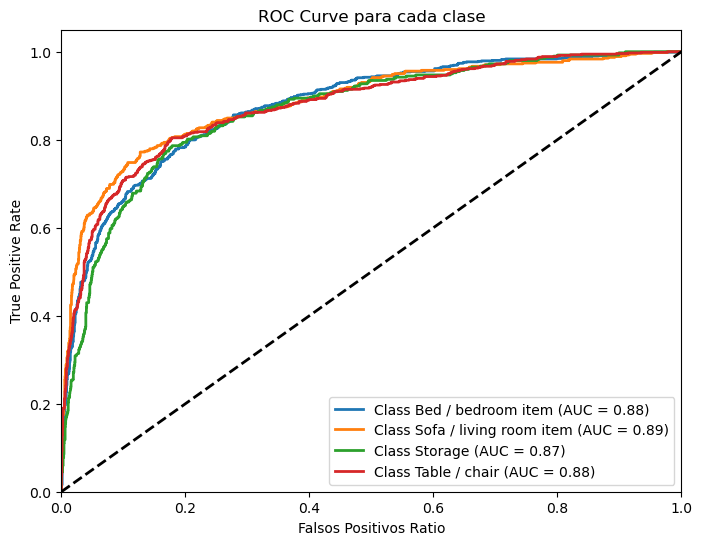

In [25]:
from sklearn.svm import SVC



# Extraer features del modelo
cnn_features_model = tf.keras.Model(inputs=model.input, outputs=model.layers[-2].output)
X_train_features = cnn_features_model.predict(X_train)
X_test_features = cnn_features_model.predict(X_test)

# Convertir label multiclase en binario
y_train_bin = label_binarize(y_train, classes=np.arange(len(label_encoder.classes_)))
y_test_bin = label_binarize(y_test, classes=np.arange(len(label_encoder.classes_)))

# Entrenar un SVM para cada label
svm_classifiers = []

for i in range(len(label_encoder.classes_)):
    svm_classifier = SVC(kernel='rbf', probability=True, C=50)
    svm_classifier.fit(X_train_features, y_train_bin[:, i])
    svm_classifiers.append(svm_classifier)

# Evaluar prediciones de los SVM
svm_predictions = np.column_stack([svm_classifier.predict(X_test_features) for svm_classifier in svm_classifiers])

# Imprimir reporte de clasificacion
report = classification_report(y_test_bin, svm_predictions, target_names=label_encoder.classes_)
print("Classification Report for All Classes:\n", report)

# Plot ROC para todos
plt.figure(figsize=(8, 6))

for i, svm_classifier in enumerate(svm_classifiers):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], svm_classifier.decision_function(X_test_features))
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Class {label_encoder.classes_[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Falsos Positivos Ratio')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve para cada clase')
plt.legend(loc='lower right')
plt.show()

### C=100

81/81 [==============================] - 2s 27ms/step


/Users/danielmac/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report for All Classes:
                          precision    recall  f1-score   support

     Bed / bedroom item       0.73      0.71      0.72       913
Sofa / living room item       0.74      0.66      0.70       544
                Storage       0.59      0.57      0.58       398
          Table / chair       0.75      0.68      0.71       726

              micro avg       0.71      0.67      0.69      2581
              macro avg       0.70      0.66      0.68      2581
           weighted avg       0.72      0.67      0.69      2581
            samples avg       0.65      0.67      0.66      2581



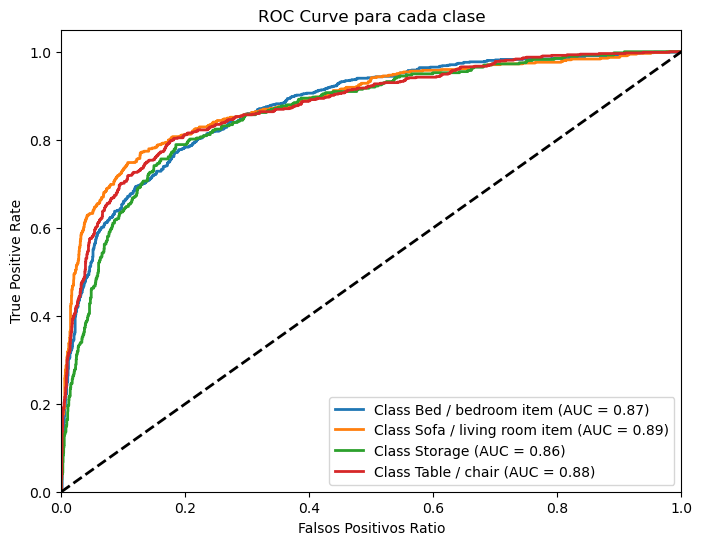

In [26]:
from sklearn.svm import SVC



# Extraer features del modelo
cnn_features_model = tf.keras.Model(inputs=model.input, outputs=model.layers[-2].output)
X_train_features = cnn_features_model.predict(X_train)
X_test_features = cnn_features_model.predict(X_test)

# Convertir label multiclase en binario
y_train_bin = label_binarize(y_train, classes=np.arange(len(label_encoder.classes_)))
y_test_bin = label_binarize(y_test, classes=np.arange(len(label_encoder.classes_)))

# Entrenar un SVM para cada label
svm_classifiers = []

for i in range(len(label_encoder.classes_)):
    svm_classifier = SVC(kernel='rbf', probability=True, C=100)
    svm_classifier.fit(X_train_features, y_train_bin[:, i])
    svm_classifiers.append(svm_classifier)

# Evaluar prediciones de los SVM
svm_predictions = np.column_stack([svm_classifier.predict(X_test_features) for svm_classifier in svm_classifiers])

# Imprimir reporte de clasificacion
report = classification_report(y_test_bin, svm_predictions, target_names=label_encoder.classes_)
print("Classification Report for All Classes:\n", report)

# Plot ROC para todos
plt.figure(figsize=(8, 6))

for i, svm_classifier in enumerate(svm_classifiers):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], svm_classifier.decision_function(X_test_features))
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Class {label_encoder.classes_[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Falsos Positivos Ratio')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve para cada clase')
plt.legend(loc='lower right')
plt.show()

### Ahora con Kernel Lineal

### c=10

81/81 [==============================] - 2s 22ms/step


/Users/danielmac/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report for All Classes:
                          precision    recall  f1-score   support

     Bed / bedroom item       0.74      0.70      0.72       913
Sofa / living room item       0.74      0.65      0.69       544
                Storage       0.56      0.54      0.55       398
          Table / chair       0.74      0.68      0.71       726

              micro avg       0.71      0.66      0.68      2581
              macro avg       0.70      0.64      0.67      2581
           weighted avg       0.71      0.66      0.68      2581
            samples avg       0.63      0.66      0.64      2581



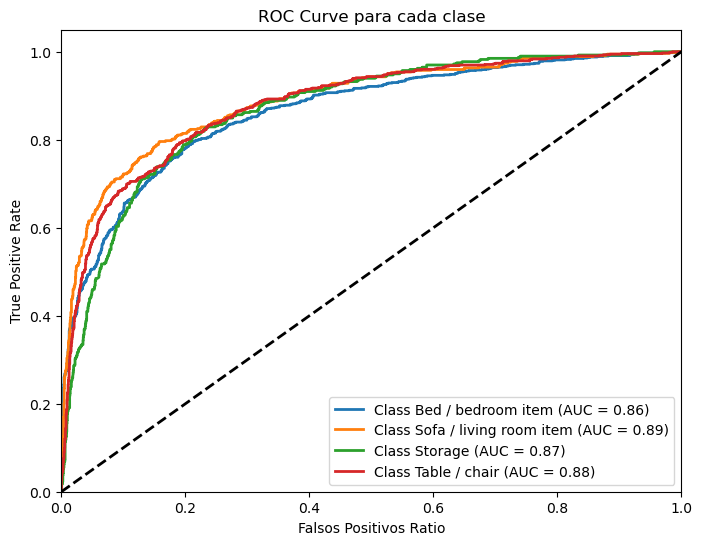

In [27]:
from sklearn.svm import SVC



# Extraer features del modelo
cnn_features_model = tf.keras.Model(inputs=model.input, outputs=model.layers[-2].output)
X_train_features = cnn_features_model.predict(X_train)
X_test_features = cnn_features_model.predict(X_test)

# Convertir label multiclase en binario
y_train_bin = label_binarize(y_train, classes=np.arange(len(label_encoder.classes_)))
y_test_bin = label_binarize(y_test, classes=np.arange(len(label_encoder.classes_)))

# Entrenar un SVM para cada label
svm_classifiers = []

for i in range(len(label_encoder.classes_)):
    svm_classifier = SVC(kernel='linear', probability=True, C=10)
    svm_classifier.fit(X_train_features, y_train_bin[:, i])
    svm_classifiers.append(svm_classifier)

# Evaluar prediciones de los SVM
svm_predictions = np.column_stack([svm_classifier.predict(X_test_features) for svm_classifier in svm_classifiers])

# Imprimir reporte de clasificacion
report = classification_report(y_test_bin, svm_predictions, target_names=label_encoder.classes_)
print("Classification Report for All Classes:\n", report)

# Plot ROC para todos
plt.figure(figsize=(8, 6))

for i, svm_classifier in enumerate(svm_classifiers):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], svm_classifier.decision_function(X_test_features))
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Class {label_encoder.classes_[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Falsos Positivos Ratio')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve para cada clase')
plt.legend(loc='lower right')
plt.show()

### C=50

81/81 [==============================] - 2s 26ms/step


/Users/danielmac/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report for All Classes:
                          precision    recall  f1-score   support

     Bed / bedroom item       0.75      0.71      0.73       913
Sofa / living room item       0.76      0.66      0.70       544
                Storage       0.55      0.53      0.54       398
          Table / chair       0.75      0.68      0.72       726

              micro avg       0.72      0.66      0.69      2581
              macro avg       0.70      0.65      0.67      2581
           weighted avg       0.72      0.66      0.69      2581
            samples avg       0.63      0.66      0.64      2581



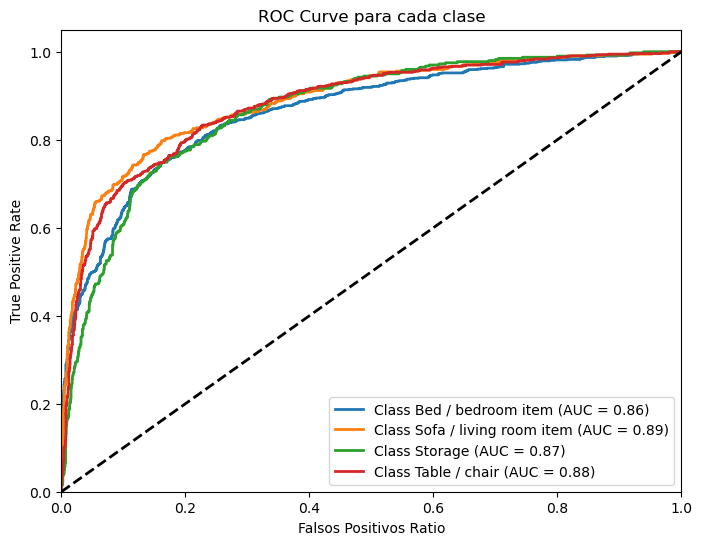

In [32]:
from sklearn.svm import SVC



# Extraer features del modelo
cnn_features_model = tf.keras.Model(inputs=model.input, outputs=model.layers[-2].output)
X_train_features = cnn_features_model.predict(X_train)
X_test_features = cnn_features_model.predict(X_test)

# Convertir label multiclase en binario
y_train_bin = label_binarize(y_train, classes=np.arange(len(label_encoder.classes_)))
y_test_bin = label_binarize(y_test, classes=np.arange(len(label_encoder.classes_)))

# Entrenar un SVM para cada label
svm_classifiers = []

for i in range(len(label_encoder.classes_)):
    svm_classifier = SVC(kernel='linear', probability=True, C=50)
    svm_classifier.fit(X_train_features, y_train_bin[:, i])
    svm_classifiers.append(svm_classifier)

# Evaluar prediciones de los SVM
svm_predictions = np.column_stack([svm_classifier.predict(X_test_features) for svm_classifier in svm_classifiers])

# Imprimir reporte de clasificacion
report = classification_report(y_test_bin, svm_predictions, target_names=label_encoder.classes_)
print("Classification Report for All Classes:\n", report)

# Plot ROC para todos
plt.figure(figsize=(8, 6))

for i, svm_classifier in enumerate(svm_classifiers):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], svm_classifier.decision_function(X_test_features))
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Class {label_encoder.classes_[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Falsos Positivos Ratio')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve para cada clase')
plt.legend(loc='lower right')
plt.show()

### C=100

81/81 [==============================] - 2s 28ms/step


/Users/danielmac/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report for All Classes:
                          precision    recall  f1-score   support

     Bed / bedroom item       0.74      0.70      0.72       913
Sofa / living room item       0.75      0.65      0.69       544
                Storage       0.55      0.53      0.54       398
          Table / chair       0.75      0.68      0.72       726

              micro avg       0.71      0.66      0.69      2581
              macro avg       0.70      0.64      0.67      2581
           weighted avg       0.72      0.66      0.69      2581
            samples avg       0.63      0.66      0.64      2581



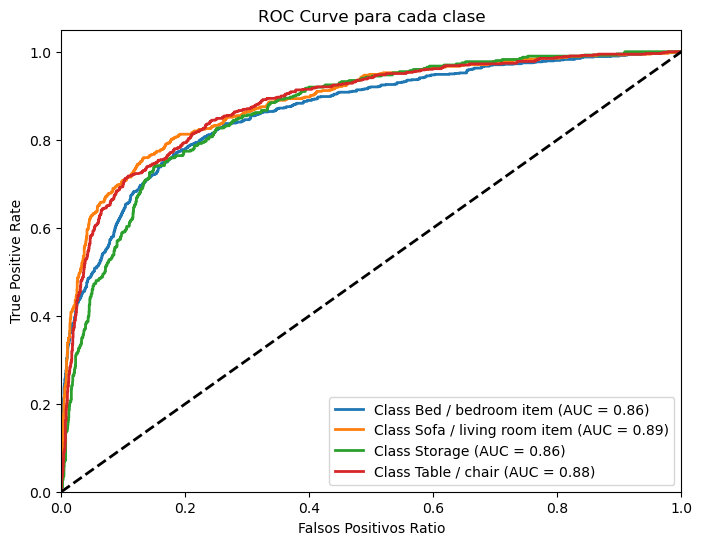

In [31]:
from sklearn.svm import SVC



# Extraer features del modelo
cnn_features_model = tf.keras.Model(inputs=model.input, outputs=model.layers[-2].output)
X_train_features = cnn_features_model.predict(X_train)
X_test_features = cnn_features_model.predict(X_test)

# Convertir label multiclase en binario
y_train_bin = label_binarize(y_train, classes=np.arange(len(label_encoder.classes_)))
y_test_bin = label_binarize(y_test, classes=np.arange(len(label_encoder.classes_)))

# Entrenar un SVM para cada label
svm_classifiers = []

for i in range(len(label_encoder.classes_)):
    svm_classifier = SVC(kernel='linear', probability=True, C=100)
    svm_classifier.fit(X_train_features, y_train_bin[:, i])
    svm_classifiers.append(svm_classifier)

# Evaluar prediciones de los SVM
svm_predictions = np.column_stack([svm_classifier.predict(X_test_features) for svm_classifier in svm_classifiers])

# Imprimir reporte de clasificacion
report = classification_report(y_test_bin, svm_predictions, target_names=label_encoder.classes_)
print("Classification Report for All Classes:\n", report)

# Plot ROC para todos
plt.figure(figsize=(8, 6))

for i, svm_classifier in enumerate(svm_classifiers):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], svm_classifier.decision_function(X_test_features))
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Class {label_encoder.classes_[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Falsos Positivos Ratio')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve para cada clase')
plt.legend(loc='lower right')
plt.show()

## Dado que la mejora no fue muy alta, usaremos ahora diferentes Gamma

### Gamma = 1, RBF, c=100

81/81 [==============================] - 2s 27ms/step


/Users/danielmac/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report for All Classes:
                          precision    recall  f1-score   support

     Bed / bedroom item       0.92      0.19      0.32       913
Sofa / living room item       0.87      0.09      0.16       544
                Storage       0.68      0.13      0.21       398
          Table / chair       0.97      0.17      0.29       726

              micro avg       0.89      0.15      0.26      2581
              macro avg       0.86      0.14      0.24      2581
           weighted avg       0.89      0.15      0.26      2581
            samples avg       0.15      0.15      0.15      2581



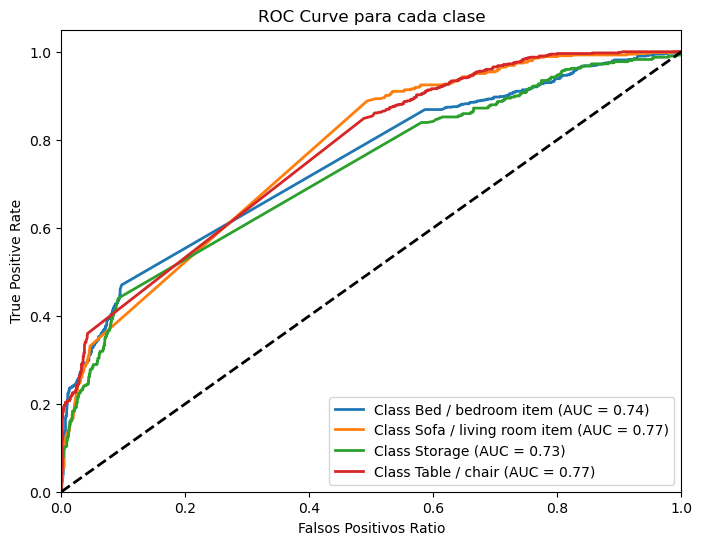

In [33]:
from sklearn.svm import SVC



# Extraer features del modelo
cnn_features_model = tf.keras.Model(inputs=model.input, outputs=model.layers[-2].output)
X_train_features = cnn_features_model.predict(X_train)
X_test_features = cnn_features_model.predict(X_test)

# Convertir label multiclase en binario
y_train_bin = label_binarize(y_train, classes=np.arange(len(label_encoder.classes_)))
y_test_bin = label_binarize(y_test, classes=np.arange(len(label_encoder.classes_)))

# Entrenar un SVM para cada label
svm_classifiers = []

for i in range(len(label_encoder.classes_)):
    svm_classifier = SVC(kernel='rbf', probability=True, C=100, gamma=1)
    svm_classifier.fit(X_train_features, y_train_bin[:, i])
    svm_classifiers.append(svm_classifier)

# Evaluar prediciones de los SVM
svm_predictions = np.column_stack([svm_classifier.predict(X_test_features) for svm_classifier in svm_classifiers])

# Imprimir reporte de clasificacion
report = classification_report(y_test_bin, svm_predictions, target_names=label_encoder.classes_)
print("Classification Report for All Classes:\n", report)

# Plot ROC para todos
plt.figure(figsize=(8, 6))

for i, svm_classifier in enumerate(svm_classifiers):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], svm_classifier.decision_function(X_test_features))
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Class {label_encoder.classes_[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Falsos Positivos Ratio')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve para cada clase')
plt.legend(loc='lower right')
plt.show()

### Gamma=10, RBF, c=100

81/81 [==============================] - 2s 26ms/step


/Users/danielmac/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report for All Classes:
                          precision    recall  f1-score   support

     Bed / bedroom item       0.92      0.18      0.30       913
Sofa / living room item       0.86      0.08      0.15       544
                Storage       0.69      0.12      0.21       398
          Table / chair       0.97      0.15      0.27       726

              micro avg       0.89      0.14      0.25      2581
              macro avg       0.86      0.13      0.23      2581
           weighted avg       0.89      0.14      0.24      2581
            samples avg       0.14      0.14      0.14      2581



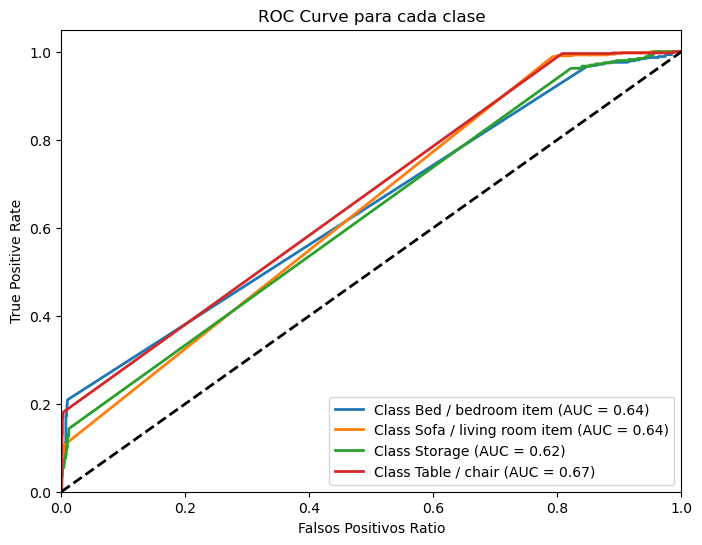

In [34]:
from sklearn.svm import SVC



# Extraer features del modelo
cnn_features_model = tf.keras.Model(inputs=model.input, outputs=model.layers[-2].output)
X_train_features = cnn_features_model.predict(X_train)
X_test_features = cnn_features_model.predict(X_test)

# Convertir label multiclase en binario
y_train_bin = label_binarize(y_train, classes=np.arange(len(label_encoder.classes_)))
y_test_bin = label_binarize(y_test, classes=np.arange(len(label_encoder.classes_)))

# Entrenar un SVM para cada label
svm_classifiers = []

for i in range(len(label_encoder.classes_)):
    svm_classifier = SVC(kernel='rbf', probability=True, C=100, gamma=10)
    svm_classifier.fit(X_train_features, y_train_bin[:, i])
    svm_classifiers.append(svm_classifier)

# Evaluar prediciones de los SVM
svm_predictions = np.column_stack([svm_classifier.predict(X_test_features) for svm_classifier in svm_classifiers])

# Imprimir reporte de clasificacion
report = classification_report(y_test_bin, svm_predictions, target_names=label_encoder.classes_)
print("Classification Report for All Classes:\n", report)

# Plot ROC para todos
plt.figure(figsize=(8, 6))

for i, svm_classifier in enumerate(svm_classifiers):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], svm_classifier.decision_function(X_test_features))
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Class {label_encoder.classes_[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Falsos Positivos Ratio')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve para cada clase')
plt.legend(loc='lower right')
plt.show()

## Debido a que un Gamma alto termina siendo similar al ingenuo, se toma un menor gamma

### Gamma=0.10, RBF, c=100

81/81 [==============================] - 2s 26ms/step


/Users/danielmac/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report for All Classes:
                          precision    recall  f1-score   support

     Bed / bedroom item       0.81      0.35      0.49       913
Sofa / living room item       0.81      0.23      0.35       544
                Storage       0.62      0.24      0.35       398
          Table / chair       0.83      0.31      0.45       726

              micro avg       0.78      0.30      0.43      2581
              macro avg       0.77      0.28      0.41      2581
           weighted avg       0.78      0.30      0.43      2581
            samples avg       0.29      0.30      0.30      2581



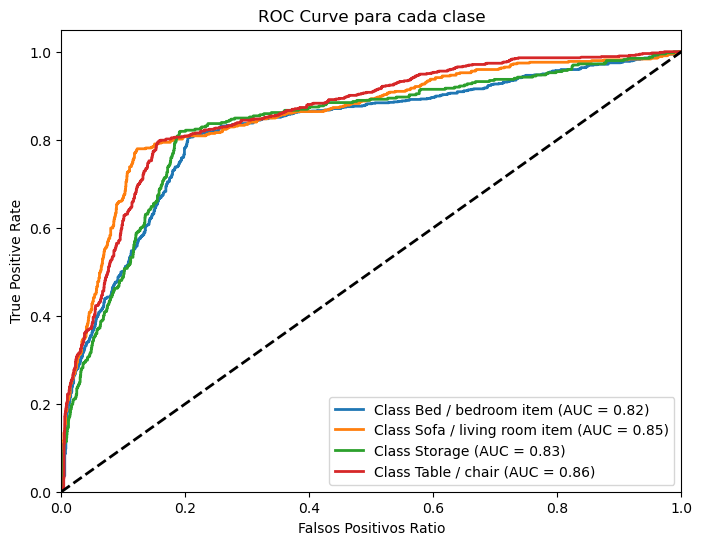

In [35]:
from sklearn.svm import SVC



# Extraer features del modelo
cnn_features_model = tf.keras.Model(inputs=model.input, outputs=model.layers[-2].output)
X_train_features = cnn_features_model.predict(X_train)
X_test_features = cnn_features_model.predict(X_test)

# Convertir label multiclase en binario
y_train_bin = label_binarize(y_train, classes=np.arange(len(label_encoder.classes_)))
y_test_bin = label_binarize(y_test, classes=np.arange(len(label_encoder.classes_)))

# Entrenar un SVM para cada label
svm_classifiers = []

for i in range(len(label_encoder.classes_)):
    svm_classifier = SVC(kernel='rbf', probability=True, C=100, gamma=0.1)
    svm_classifier.fit(X_train_features, y_train_bin[:, i])
    svm_classifiers.append(svm_classifier)

# Evaluar prediciones de los SVM
svm_predictions = np.column_stack([svm_classifier.predict(X_test_features) for svm_classifier in svm_classifiers])

# Imprimir reporte de clasificacion
report = classification_report(y_test_bin, svm_predictions, target_names=label_encoder.classes_)
print("Classification Report for All Classes:\n", report)

# Plot ROC para todos
plt.figure(figsize=(8, 6))

for i, svm_classifier in enumerate(svm_classifiers):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], svm_classifier.decision_function(X_test_features))
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Class {label_encoder.classes_[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Falsos Positivos Ratio')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve para cada clase')
plt.legend(loc='lower right')
plt.show()

### Gamma=0.01, RBF, C=100

81/81 [==============================] - 2s 28ms/step


/Users/danielmac/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report for All Classes:
                          precision    recall  f1-score   support

     Bed / bedroom item       0.74      0.71      0.72       913
Sofa / living room item       0.74      0.67      0.70       544
                Storage       0.59      0.57      0.58       398
          Table / chair       0.75      0.69      0.72       726

              micro avg       0.72      0.67      0.70      2581
              macro avg       0.70      0.66      0.68      2581
           weighted avg       0.72      0.67      0.70      2581
            samples avg       0.66      0.67      0.66      2581



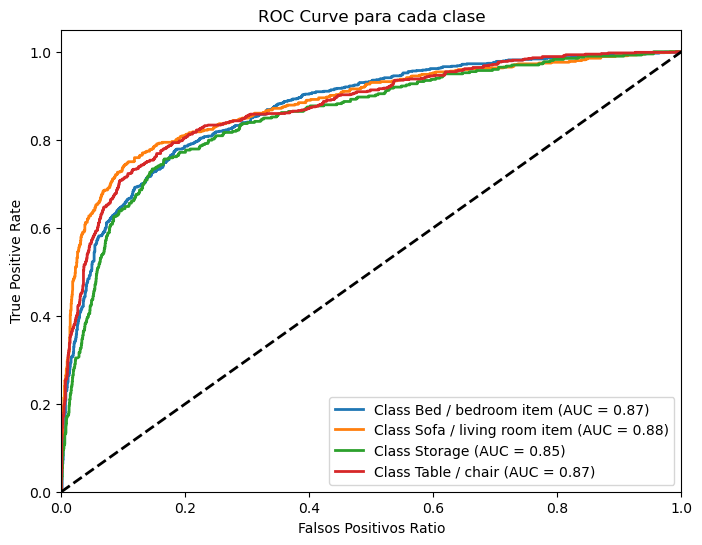

In [38]:
from sklearn.svm import SVC



# Extraer features del modelo
cnn_features_model = tf.keras.Model(inputs=model.input, outputs=model.layers[-2].output)
X_train_features = cnn_features_model.predict(X_train)
X_test_features = cnn_features_model.predict(X_test)

# Convertir label multiclase en binario
y_train_bin = label_binarize(y_train, classes=np.arange(len(label_encoder.classes_)))
y_test_bin = label_binarize(y_test, classes=np.arange(len(label_encoder.classes_)))

# Entrenar un SVM para cada label
svm_classifiers = []

for i in range(len(label_encoder.classes_)):
    svm_classifier = SVC(kernel='rbf', probability=True, C=100, gamma=0.01)
    svm_classifier.fit(X_train_features, y_train_bin[:, i])
    svm_classifiers.append(svm_classifier)

# Evaluar prediciones de los SVM
svm_predictions = np.column_stack([svm_classifier.predict(X_test_features) for svm_classifier in svm_classifiers])

# Imprimir reporte de clasificacion
report = classification_report(y_test_bin, svm_predictions, target_names=label_encoder.classes_)
print("Classification Report for All Classes:\n", report)

# Plot ROC para todos
plt.figure(figsize=(8, 6))

for i, svm_classifier in enumerate(svm_classifiers):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], svm_classifier.decision_function(X_test_features))
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Class {label_encoder.classes_[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Falsos Positivos Ratio')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve para cada clase')
plt.legend(loc='lower right')
plt.show()

### Gamma=0.001, RBF, c=100

81/81 [==============================] - 2s 24ms/step


/Users/danielmac/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report for All Classes:
                          precision    recall  f1-score   support

     Bed / bedroom item       0.74      0.70      0.72       913
Sofa / living room item       0.75      0.64      0.69       544
                Storage       0.59      0.56      0.58       398
          Table / chair       0.75      0.68      0.71       726

              micro avg       0.72      0.66      0.69      2581
              macro avg       0.71      0.65      0.67      2581
           weighted avg       0.72      0.66      0.69      2581
            samples avg       0.64      0.66      0.65      2581



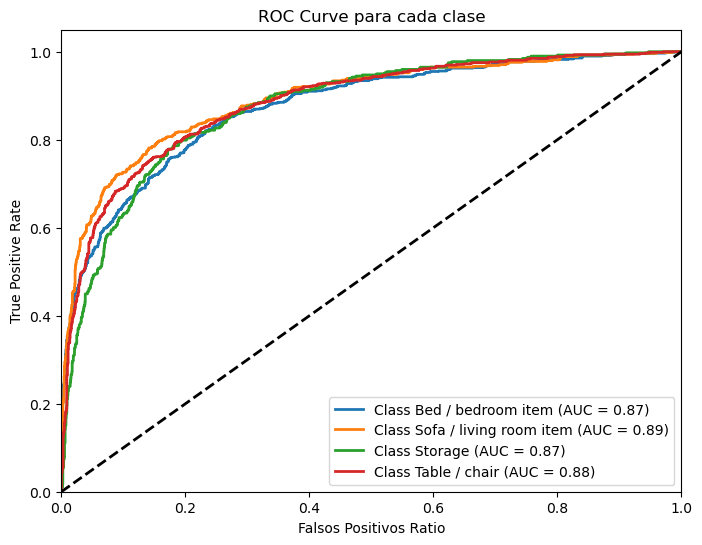

In [36]:
from sklearn.svm import SVC



# Extraer features del modelo
cnn_features_model = tf.keras.Model(inputs=model.input, outputs=model.layers[-2].output)
X_train_features = cnn_features_model.predict(X_train)
X_test_features = cnn_features_model.predict(X_test)

# Convertir label multiclase en binario
y_train_bin = label_binarize(y_train, classes=np.arange(len(label_encoder.classes_)))
y_test_bin = label_binarize(y_test, classes=np.arange(len(label_encoder.classes_)))

# Entrenar un SVM para cada label
svm_classifiers = []

for i in range(len(label_encoder.classes_)):
    svm_classifier = SVC(kernel='rbf', probability=True, C=100, gamma=0.001)
    svm_classifier.fit(X_train_features, y_train_bin[:, i])
    svm_classifiers.append(svm_classifier)

# Evaluar prediciones de los SVM
svm_predictions = np.column_stack([svm_classifier.predict(X_test_features) for svm_classifier in svm_classifiers])

# Imprimir reporte de clasificacion
report = classification_report(y_test_bin, svm_predictions, target_names=label_encoder.classes_)
print("Classification Report for All Classes:\n", report)

# Plot ROC para todos
plt.figure(figsize=(8, 6))

for i, svm_classifier in enumerate(svm_classifiers):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], svm_classifier.decision_function(X_test_features))
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Class {label_encoder.classes_[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Falsos Positivos Ratio')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve para cada clase')
plt.legend(loc='lower right')
plt.show()

### Gamma=scale, RBF, c=100

81/81 [==============================] - 3s 34ms/step


/Users/danielmac/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report for All Classes:
                          precision    recall  f1-score   support

     Bed / bedroom item       0.73      0.71      0.72       913
Sofa / living room item       0.74      0.66      0.70       544
                Storage       0.59      0.57      0.58       398
          Table / chair       0.75      0.68      0.71       726

              micro avg       0.71      0.67      0.69      2581
              macro avg       0.70      0.66      0.68      2581
           weighted avg       0.72      0.67      0.69      2581
            samples avg       0.65      0.67      0.66      2581



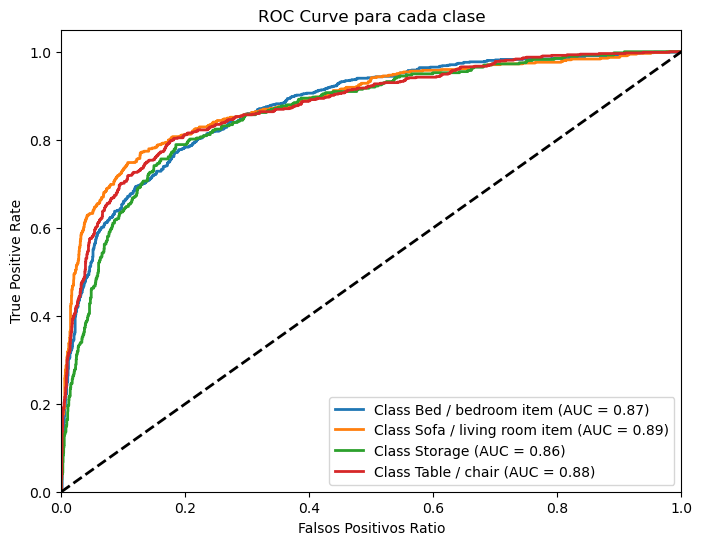

In [37]:
from sklearn.svm import SVC



# Extraer features del modelo
cnn_features_model = tf.keras.Model(inputs=model.input, outputs=model.layers[-2].output)
X_train_features = cnn_features_model.predict(X_train)
X_test_features = cnn_features_model.predict(X_test)

# Convertir label multiclase en binario
y_train_bin = label_binarize(y_train, classes=np.arange(len(label_encoder.classes_)))
y_test_bin = label_binarize(y_test, classes=np.arange(len(label_encoder.classes_)))

# Entrenar un SVM para cada label
svm_classifiers = []

for i in range(len(label_encoder.classes_)):
    svm_classifier = SVC(kernel='rbf', probability=True, C=100, gamma='scale')
    svm_classifier.fit(X_train_features, y_train_bin[:, i])
    svm_classifiers.append(svm_classifier)

# Evaluar prediciones de los SVM
svm_predictions = np.column_stack([svm_classifier.predict(X_test_features) for svm_classifier in svm_classifiers])

# Imprimir reporte de clasificacion
report = classification_report(y_test_bin, svm_predictions, target_names=label_encoder.classes_)
print("Classification Report for All Classes:\n", report)

# Plot ROC para todos
plt.figure(figsize=(8, 6))

for i, svm_classifier in enumerate(svm_classifiers):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], svm_classifier.decision_function(X_test_features))
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Class {label_encoder.classes_[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Falsos Positivos Ratio')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve para cada clase')
plt.legend(loc='lower right')
plt.show()

Epoch 1/17
189/189 [==============================] - 22s 112ms/step - loss: 1.3004 - accuracy: 0.3809 - val_loss: 1.1955 - val_accuracy: 0.4614
Epoch 2/17
189/189 [==============================] - 19s 100ms/step - loss: 1.1468 - accuracy: 0.4987 - val_loss: 1.0368 - val_accuracy: 0.5626
Epoch 3/17
189/189 [==============================] - 17s 89ms/step - loss: 1.0039 - accuracy: 0.5819 - val_loss: 0.9515 - val_accuracy: 0.6029
Epoch 4/17
189/189 [==============================] - 17s 91ms/step - loss: 0.9079 - accuracy: 0.6266 - val_loss: 0.9726 - val_accuracy: 0.5878
Epoch 5/17
189/189 [==============================] - 17s 91ms/step - loss: 0.8098 - accuracy: 0.6719 - val_loss: 0.9234 - val_accuracy: 0.6168
Epoch 6/17
189/189 [==============================] - 18s 94ms/step - loss: 0.7309 - accuracy: 0.7066 - val_loss: 0.8434 - val_accuracy: 0.6540
Epoch 7/17
189/189 [==============================] - 18s 94ms/step - loss: 0.6504 - accuracy: 0.7407 - val_loss: 0.8342 - val_accurac

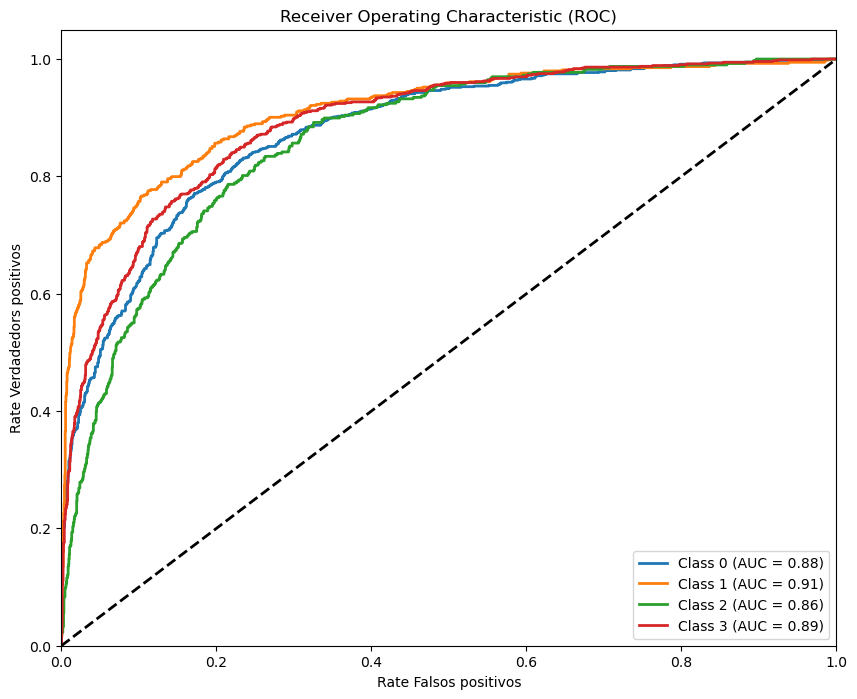

In [2]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, recall_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# cargar CSV
data = pd.read_csv("/Users/danielmac/Downloads/archive (2)/furniture_data_img.csv")
exclude_categories = ["Lighting", "Other", "TV / stereo", "Antique / art", "Textiles / decoration"]

# Excluir información con pocos datos
data = data[~data["Furniture_Type"].isin(exclude_categories)]
# Definir el Path para las imagenes
image_dir = "/Users/danielmac/Downloads/archive (2)/furniture_images/"

# cargar imagenes
image_data = []
for image_file in data["Image_File"]:
    image_path = image_dir + image_file  # concatenar path
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(150, 150))
    img = tf.keras.preprocessing.image.img_to_array(img)
    img = img / 255.0  # Normalizar valores de pixeles
    image_data.append(img)

X = np.array(image_data)
y = data["Furniture_Type"]

# Encode las etiquetas
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# separar data entre entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y)

# MEJOR L
L=24

# Modelo CNN con L
model = Sequential([
    Conv2D(L, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((3, 3),padding='same'),
    Conv2D(L*2, (3, 3), activation='relu'),
    MaxPooling2D((3, 3),padding='same'),
    Conv2D(L*4, (2, 2), activation='relu'),
    MaxPooling2D((3, 3),padding='same'),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(len(label_encoder.classes_), activation='softmax')
])

# Compilar el modelo con optimizador ADAM y sparse categorical crossentropy
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])



# Fit del modelo
batch_size = 32
epochs = 17
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test))

# guardar modelo en KERAS
model.save('furniture_recognition_model.keras')

# hacer predicción de 1 imagen
new_image_path = "/Users/danielmac/Downloads/Test/sillatest.jpg"
new_image_path = os.path.join(new_image_path)  # concatenar directorio
new_img = tf.keras.preprocessing.image.load_img(new_image_path, target_size=(150, 150))
new_img = tf.keras.preprocessing.image.img_to_array(new_img)
new_img = new_img / 255.0
new_img = np.expand_dims(new_img, axis=0)  # Añadir dimension del Batch
prediction = model.predict(new_img)
predicted_label = label_encoder.inverse_transform([np.argmax(prediction)])[0]

print(f"El modelo predijo que la foto es: {predicted_label}")

# Evaluar modelo
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = y_test
#Accuracy, recall y F1
accuracy = accuracy_score(y_true, y_pred_classes)
f1 = f1_score(y_true, y_pred_classes, average='weighted')
recall = recall_score(y_true, y_pred_classes, average='weighted')
#imprimir datos finales 
print(f"Accuracy: {accuracy:.4f}\nF1 Score: {f1:.4f}\nRecall (Sensitivity): {recall:.4f}")

# Crear un modelo de clasificación
report = classification_report(y_true, y_pred_classes, target_names=label_encoder.classes_)
print("Reporte de clasificación:\n", report)

# Crear matriz de confusión
conf_matrix = confusion_matrix(y_true, y_pred_classes)
print("Confusion Matrix:\n", conf_matrix)

y_test_onehot = label_binarize(y_test, classes=np.arange(len(label_encoder.classes_)))

#Curva ROC para multiclasificación
fpr = dict()
tpr = dict()
roc_auc = dict()

y_pred_prob = model.predict(X_test)

for i in range(len(label_encoder.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test_onehot[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Imprimir curvas ROC
plt.figure(figsize=(10, 8))
for i in range(len(label_encoder.classes_)):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Rate Falsos positivos')
plt.ylabel('Rate Verdadedors positivos')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()